## Matplotlib

las siguientes lineas permiten que Notebook pueda graficar

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
#seaborn-poster
#whitegrid

---
---

In [2]:
from sympy import *

Declarando variables de la ecuación

In [3]:
v = Symbol('v')
t = Symbol('t')
u = 2510
Mo = 2.8*(10**6)
c = 13.3*(10**3)
g = (9.81)

Definiendo la función

In [4]:
def v(t): return (u * ln(Mo/(Mo - (c*t)))  - (g*t)) - 335
v(t)

-9.81*t + 2510*log(2800000.0/(2800000.0 - 13300.0*t)) - 335

Graficamos la funcion definida

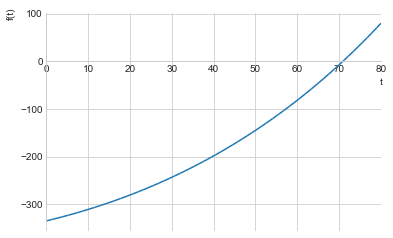

In [5]:
plot(v(t),(t,0,80))

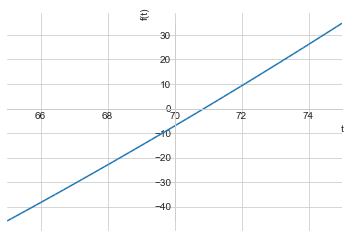

In [6]:
plot(v(t),(t,65,75))

**Determinando el momento en que el cohete alcanza la velocidad del sonido (335 m/s)**

----
----

### Algoritmo de bisección

Algoritmo Biseccion
```
    Leer f, a, b, err    
    Mientras (b - a) > err Hacer
        c <- (a+b)/2
        Si f(c) = 0 Entonces
            Terminar
        SiNo
            Si f(a) < 335 Y f(c) < 355 
                a <- c
            SiNo 
                b <- c
            Fin Si
        Fin Si
    Fin Mientras
    Escribir c
```

## Codigo en Python

In [7]:
a = 65
b = 75
err = 0.000001
v(t)

-9.81*t + 2510*log(2800000.0/(2800000.0 - 13300.0*t)) - 335

In [8]:
def biseccion(f,a,b,err):
    while (b - a) >= err:
        c = (a+b)/2
        if f(c) == 0:
            return c
        else:
            if f(a) * f(c) > 0:
                a = c
            else:
                b = c
    return c

In [9]:
from math import *
rz = biseccion(v,a,b,err)
rz

70.87797224521637

In [10]:
v(rz)

-1.86661054613069e-7

### Algoritmo Punto fijo

```
Leer g, x, err
Mientras |g(x) - x| > err
    x <- g(x)
Fin Mientras
Escribir x
```

Sea `v(t) = g(t) - t`

Si `0 = u * ln(Mo/(Mo-c*t)) - g*t`

luego `t = (u * ln(Mo/(Mo-c*t))/g`

Entonces `g(t) = (u * ln(Mo/(Mo-c*t)))/g`
`

Sabemos que hay una raiz cerca por la izquierda de t = 71, por lo que tomaremos to=70 como punto inicial

In [29]:
def gf(t): return (u * ln(Mo/(Mo-c*t)))/g
gf(t)

255.861365953109*log(2800000.0/(2800000.0 - 13300.0*t))

In [57]:
diffG = gf(t)
diffG.diff(t)

9528277268093.78*(1.0 - 0.00475*t)/(2800000.0 - 13300.0*t)**2

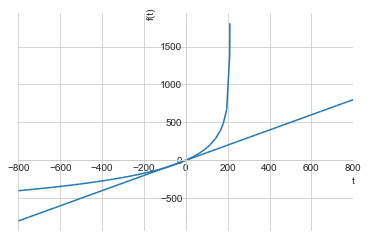

In [51]:
plot(gf(t),t,(t,-800,800))

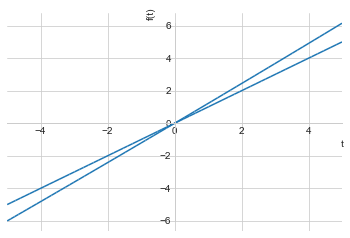

In [52]:
plot(gf(t),t,(t,-5,5))

In [44]:
gf(0)

0

In [39]:
gf(0.0001)

0.000121534177684930

El teoriema de punto fijo establece que si no se cumple que `g(a) > a` y además `g(b) < b`, pero `g(a) = a` ó `g(b) = b` entonces existe un punto fijo en un extremo, en nuestro caso `g(0) = 0`

In [54]:
gf.diff(t)

AttributeError: 'function' object has no attribute 'diff'

In [46]:
def Punto_Fijo (g,x,err):
    while (abs(g(x)-x)) >= err:
        x = g(x)
    return abs(g(x)-x)
    
to = 0
err = 0.0001

Punto_Fijo(gf,to,err)

0

In [17]:
abs(gf(to))

103.423229424710